# Grading matplotlib plots

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Line plots

In [2]:
from plotchecker import LinePlotChecker

x = np.linspace(0, 1, 20)[:, None] * np.ones((20, 3))
y = x ** np.array([1, 2, 3])

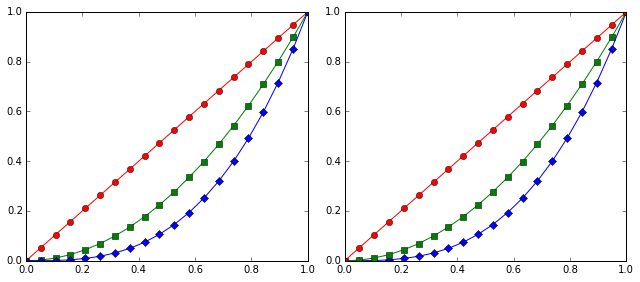

In [3]:
fig, axes = plt.subplots(1, 2)

colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# plot some lines
for i in range(3):
    axes[0].plot(x[:, i], y[:, i], color=colors[i], marker=markers[i])
    
# plot them in a different order
for i in range(2, -1, -1):
    axes[1].plot(x[:, i], y[:, i], color=colors[i], marker=markers[i])
    
fig.set_figwidth(9)
plt.tight_layout()

In [4]:
# run the same assertions on all the plots!
for ax in axes:
    pc = LinePlotChecker(ax, try_permutations=True)
    pc.assert_x_data_equal(x)
    pc.assert_y_data_equal(y)
    pc.assert_colors_equal(colors)
    pc.assert_markers_equal(markers)
    
print('Success!')

Success!


## Scatter plots

In [4]:
from plotchecker import ScatterPlotChecker

x = np.random.rand(20)
y = np.random.rand(20)

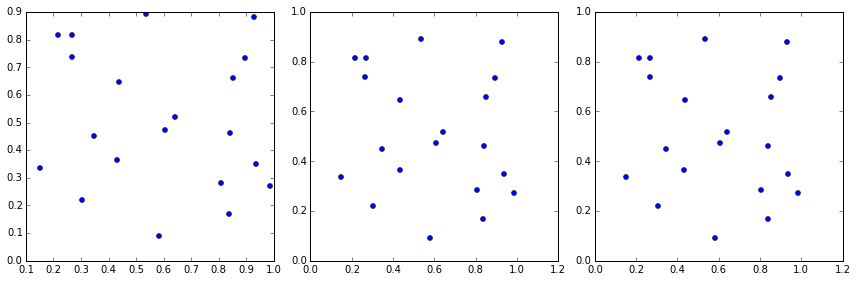

In [5]:
fig, axes = plt.subplots(1, 3)

# create a scatter plot with plot
axes[0].plot(x, y, 'o', color='b', ms=5)

# create a scatter plot with scatter
axes[1].scatter(x, y, s=25, linewidth=0.5)

# create a scatter plot with plot *and* scatter!
axes[2].plot(x[:10], y[:10], 'o', color='b', ms=5)
axes[2].scatter(x[10:], y[10:], s=25, linewidth=0.5)

fig.set_figwidth(12)
plt.tight_layout()

In [6]:
# run the same assertions on all the plots!
for ax in axes:
    pc = ScatterPlotChecker(ax)
    pc.assert_x_data_equal(x)
    pc.assert_y_data_equal(y)
    pc.assert_colors_equal('b')
    pc.assert_edgecolors_equal('k')
    pc.assert_edgewidths_equal(0.5)
    pc.assert_sizes_equal(25)
    pc.assert_markersizes_equal(5)
    
    # can't actually check markers, since they are unrecoverable
    # from plt.scatter :(
    #pc.assert_markers_equal('o')
    
print('Success!')

Success!


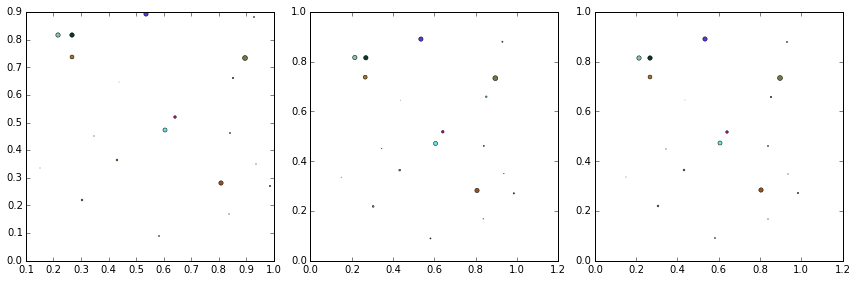

In [7]:
fig, axes = plt.subplots(1, 3)

# choose some random colors and sizes
colors = np.random.rand(20, 3)
sizes = np.random.rand(20) * 5

# create a scatter plot with plot, using a loop
for i in range(20):
    axes[0].plot(x[i], y[i], 'o', color=colors[i], ms=sizes[i])

# create a scatter plot with scatter
axes[1].scatter(x, y, c=colors, s=sizes ** 2, linewidth=0.5)

# create a scatter plot with scatter, using a loop
for i in range(20):
    axes[2].scatter(x[i], y[i], c=colors[i], s=sizes[i] ** 2, linewidth=0.5)

fig.set_figwidth(12)
plt.tight_layout()

In [8]:
# run the same assertions on all the plots!
for ax in axes:
    pc = ScatterPlotChecker(ax)
    pc.assert_x_data_equal(x)
    pc.assert_y_data_equal(y)
    pc.assert_colors_equal(colors)
    pc.assert_edgecolors_equal('k')
    pc.assert_edgewidths_equal(0.5)
    pc.assert_sizes_equal(sizes ** 2)
    pc.assert_markersizes_equal(sizes)
    
    # can't actually check markers, since they are unrecoverable
    # from plt.scatter :(
    #pc.assert_markers_equal('o')

print('Success!')

Success!
